# Solving linear systems of equations

## Motivation

TODO

TODO: include: ill-conditioned systems (Sec 9.3.3)

$$\begin{array}{cccccccccccc}
a_{11}x_1 &+& a_{12}x_2 &+& a_{13}x_3 &+& \dots &+& a_{1n}x_n = &b_1 \\
a_{21}x_1 &+& a_{22}x_2 &+& a_{23}x_3 &+& \dots &+& a_{2n}x_n = &b_2 \\
\ \vdots &&\ \vdots &&\ \vdots &&\ \ddots &&\ \vdots \ & \vdots \\
a_{n1}x_1 &+& a_{n2}x_2 &+& a_{n3}x_3 &+& \dots &+&a_{nn}x_n = &b_n
\end{array}$$

## Hand solving systems

### Graphically

In a chicken and rabbit farm, there are 35 heads and 94 legs. How many chickens and how many rabbits do we have?

$$x_1 + x_2 = 35\\
2x_1 + 4x_2 = 94$$

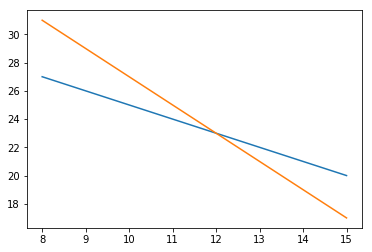

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(8, 16, 1)
y_1 = 35 - x
y_2 = (94 - 4 * x) / 2

plt.plot(x, y_1)
plt.plot(x, y_2)

How would you do it for a system of three equations with three incognitas? And for four?

### Cramer's Rule

TODO Does not scale well

#### The coefficient matrix and determinants

$$[A]\{X\} = \{B\}$$


The coefficient matrix can be expressed as:

$$A = \begin{bmatrix}
a_{11}&a_{12}&a_{13}\\
a_{21}&a_{22}&a_{23}\\
a_{31}&a_{32}&a_{33}\\
\end{bmatrix}$$

And the determinant is:
$$D = \begin{vmatrix}
a_{11}&a_{12}&a_{13}\\
a_{21}&a_{22}&a_{23}\\
a_{31}&a_{32}&a_{33}\\
\end{vmatrix}$$

Cramer's rule states that each unknown in a system of linear algebraic equations may be expressed as a fraction of two determinants with denominator D and with the numerator obtained from D by replacing the column of coefficients of the unknown in question by the constants $b_1 ,b_2 , \ldots, b_n$. For example, x_1 would be computed as:

$$ x_1 = \frac{\begin{vmatrix}
b_{1}&a_{12}&a_{13}\\
b_{2}&a_{22}&a_{23}\\
b_{3}&a_{32}&a_{33}\\
\end{vmatrix}}{D}$$


#### Example

Use Cramer's rule to solve
$$\begin{matrix}
0.3x_1 &+& 0.52x_2 &+& x_3 &=& −0.01\\
0.5x_1 &+& x_2 &+& 1.9x_3 &=& 0.67\\
0.1x_1 &+& 0.3x_2 &+& 0.5x_3 &=& −0.44\\
\end{matrix}
$$

In [24]:
# TODO code the example

## Gauss elimination

In particular, we are going to do _naive_ Gauss elimination

### Elimination of unknowns
The basic strategy is to multiply the equations by constants so that one of the unknowns will be eliminated when the two equations are combined. The result is a single equation that can be solved for the remaining unknown.


#### Exercise

Use elimination of unknowns to solve

$$\begin{matrix}
3x_1 &+& 2x_2 &=& 18\\
−x_1 &+& 2x_2 &=& 2
\end{matrix}
$$

We can extend the procedure to larger systems. In the general case, it will consist of

1. Forward Elimination
2. Back substution



### Forward elimination

We want to reduce the system so that the coefficient matrix is upper triangular. This way we will be able to solve arbitrarily large systems. 

$$\begin{array}{cccccccccccc}
a_{11}x_1 &+& a_{12}x_2 &+& a_{13}x_3 &+& \dots &+& a_{1n}x_n = &b_1 \\
a_{21}x_1 &+& a_{22}x_2 &+& a_{23}x_3 &+& \dots &+& a_{2n}x_n = &b_2 \\
\ \vdots &&\ \vdots &&\ \vdots &&\ \ddots &&\ \vdots \ & \vdots \\
a_{n1}x_1 &+& a_{n2}x_2 &+& a_{n3}x_3 &+& \dots &+&a_{nn}x_n = &b_n
\end{array}$$

The initial step is to multiply the first equation by $a_{21}/a_{11}$

What will be the result?

We can subtract it from the second equation to obtain:

$$\left(a_{21} - \frac{a_{21}}{a_{11}}a_{11}\right) x_1 + \left(a_{22} - \frac{a_{21}}{a_{11}}a_{12}\right) x_2 + \left(a_{23} - \frac{a_{21}}{a_{11}}a_{13}\right) x_3 + \dots +\left(a_{2n} - \frac{a_{21}}{a_{11}}a_{1n}\right) x_n = b_2 - \left(\frac{a_{11}}{a_{21}}b_1\right)$$


and then from the rest to get:

$$\left[\begin{array}{ccc|c}
a_{11}&a_{12}&a_{13}&b_1\\
&a'_{22}&a'_{23}&b'_2\\
&a'_{32}&a'_{33}&b'_3\\
\end{array}\right]$$

The primes indicate that the value is not the original one. $a_{11}$ is called the _pivot element_ for this step.


Applying this process row by row gets us from this:

$$\left[\begin{array}{ccc|c}
a_{11}&a_{12}&a_{13}&b_1\\
a_{21}&a_{22}&a_{23}&b_2\\
a_{31}&a_{32}&a_{33}&b_3\\
\end{array}\right]$$

To this: 

$$\left[\begin{array}{ccc|c}
a_{11}&a_{12}&a_{13}&b_1\\
 &a'_{22}&a'_{23}&b'_2\\
&&a''_{33}&b''_3\\
\end{array}\right]$$


#### Example

Apply forward elimination to the following system:


$$\begin{matrix}
3x_1 &-& 0.1x_2 &-& 0.2x_3  &=& 7.85\\
0.1x_1 &+& 7x_2 &-& 0.3x_3  &=& -19.3\\
0.3x_1 &-& 0.2x_2 &+& 10x_3  &=& 71.4\\
\end{matrix}
$$

In [51]:
AB = np.array([3, -0.1, -0.2, 7.85, 0.1, 7, -0.3, -19.3, 0.3, -0.2, 10, 71.4]).reshape(3,4)
AB

array([[  3.  ,  -0.1 ,  -0.2 ,   7.85],
       [  0.1 ,   7.  ,  -0.3 , -19.3 ],
       [  0.3 ,  -0.2 ,  10.  ,  71.4 ]])

In [52]:
# First pass

pivot_1 = AB[0,0]
a_21 = AB[1,0]

AB_prime = AB.copy()
AB_prime[1] = AB[1] - (AB[1,0] / pivot_1) * AB[0]
AB_prime[2] = AB[2] - (AB[2,0] / pivot_1) * AB[0]
AB_prime

array([[  3.        ,  -0.1       ,  -0.2       ,   7.85      ],
       [  0.        ,   7.00333333,  -0.29333333, -19.56166667],
       [  0.        ,  -0.19      ,  10.02      ,  70.615     ]])

In [59]:
# Second pass
pivot_2 = AB_prime[1,1]

AB_primeprime = AB_prime.copy()
AB_primeprime[2] = AB_prime[2] - (AB_prime[2,1] / pivot_2) * AB_prime[1]
AB_primeprime

array([[  3.        ,  -0.1       ,  -0.2       ,   7.85      ],
       [  0.        ,   7.00333333,  -0.29333333, -19.56166667],
       [  0.        ,   0.        ,  10.01204188,  70.08429319]])

### Back substitution

Now we can use the upper triangular form of the coefficient matrix to solve each of the unknowns in turn.

#### Example

Execute back substitution on the triangular matrix we obtained.

In [60]:
x_3 = AB_primeprime[2,3] / AB_primeprime[2,2]
x_3

7.000000000000002

In [61]:
x_2 = (AB_primeprime [1,3] - AB_primeprime[1,2] * x_3 ) / AB_primeprime[1,1]
x_2

-2.5

In [62]:
x_1 =  (AB_primeprime[0,3] - AB_primeprime[0,1] * x_2 - AB_primeprime[0,2] * x_3) / AB_primeprime[0,0] 
x_1

3.0

#### Example

Verify the results we obtained

In [63]:
x = np.array([x_1, x_2, x_3])
x

array([ 3. , -2.5,  7. ])

In [69]:
A = AB[:,:3]
A.dot(x)

array([  7.85, -19.3 ,  71.4 ])

#### Challenge

Can you implement the forward elimination and back substitution procedures for the general case?

### Pitfalls

* Division by zero → Pivoting
* Round-off errors
* Ill-conditioned systems
* Singular systems and zero diagonal elements

### The three falling parachutists

TODO: consider: here or in the practice??

### Gauss-Jordan

The Gauss-Jordan method is a variation of Gauss elimination. The major difference is that when an unknown is eliminated in the Gauss-Jordan method, it is eliminated from all other equations rather than just the subsequent ones. In addition, all rows are normalized by dividing them by their pivot elements. Thus, the elimination step results in an identity matrix rather than a triangular matrix. Consequently, it is not necessary to employ back substitution to obtain the solution.

TODO: example?

## LU decomposition for matrix inversion

The main interest of LU descomposition methods is to rethink the elimination step so that it only implies operations on the coefficient matrix. This will allow us to perform the operations much quicker, especially if we need to operate on many different $B$s with the same $A$, as is often the case.

TODO: which cases?? section 10.2.2 from Chapra looks really interesting.

It will also allow us to compute a matrix inverse, which is useful in many engineering applications.

# Problems

# Further Reading


# Stuff (remove before class)

In [14]:
A = np.array([1, 1, 2, 4]).reshape(2,2)
B = np.array([35, 94])
A, B

(array([[1, 1],
        [2, 4]]), array([35, 94]))

In [15]:
import numpy.linalg as la

la.inv(A).dot(B)

array([23., 12.])